In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from BMVarMiON import BMVarMiON

In [2]:
#Test dataset
N_samples = 1000

x_in = torch.tensor(np.load('../../../trainingdata/bm/12x12/test/x_in.npy'), dtype=torch.double)
x_out = torch.tensor(np.load('../../../trainingdata/bm/12x12/test/x_out.npy'), dtype=torch.double)
xi = torch.tensor(np.load('../../../trainingdata/bm/12x12/test/xi.npy'), dtype=torch.double)
x_D = torch.tensor(np.load('../../../trainingdata/bm/12x12/test/x_D.npy'), dtype=torch.double)

In [65]:
from BMVarMiON import BMVarMiON

model = BMVarMiON
logdir = '../../../nnlogs'
sublogdir = 'bm2'
map_location = 'cpu'

model = loadmodelfromlabel(model=BMVarMiON, label='VarMiON', logdir=logdir, sublogdir=sublogdir, map_location=map_location)

In [21]:
x_circle = np.linspace(-1,1, 100)
y_plus = np.sqrt(1-x_circle**2)
y_min = -np.sqrt(1-x_circle**2)

In [50]:
i = 0

In [51]:
x_cm, x_in_t, x_D_t = model.translate(x_in, x_D)
x_in_tt = model.translateback(x_cm, x_in_t)

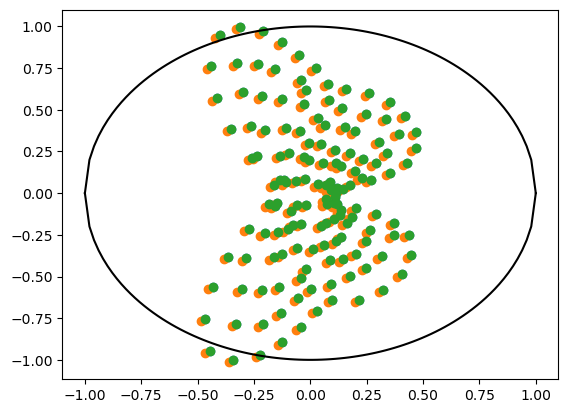

In [52]:
plt.plot(x_circle, y_plus, color='black')
plt.plot(x_circle, y_min, color='black')
plt.scatter(x_in[i,:,:,0], x_in[i,:,:,1])
plt.scatter(x_in_t[i,:,:,0], x_in_t[i,:,:,1])
plt.scatter(x_in_tt[i,:,:,0], x_in_tt[i,:,:,1])

In [53]:
r_max, x_in_s, x_D_s = model.scale(x_in, x_D)
x_in_ss = model.scaleback(r_max, x_in_s)

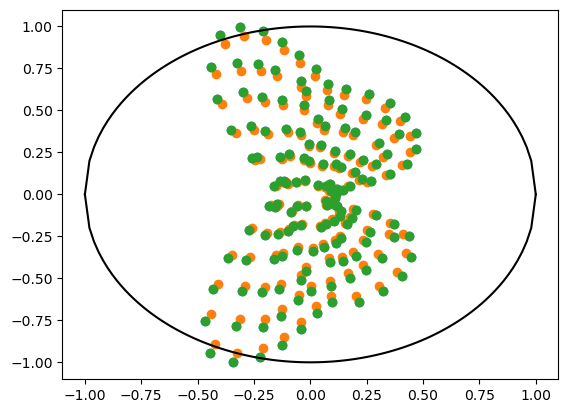

In [54]:
plt.plot(x_circle, y_plus, color='black')
plt.plot(x_circle, y_min, color='black')
plt.scatter(x_in[i,:,:,0], x_in[i,:,:,1])
plt.scatter(x_in_s[i,:,:,0], x_in_s[i,:,:,1])
plt.scatter(x_in_ss[i,:,:,0], x_in_ss[i,:,:,1])

In [55]:
theta_max, i_R180, i_flip, x_in_rf, x_D_rf = model.rotate_flip(x_in, x_D)
x_in_rffr = model.rotate_flip_back(theta_max, i_R180, i_flip, x_in_rf)

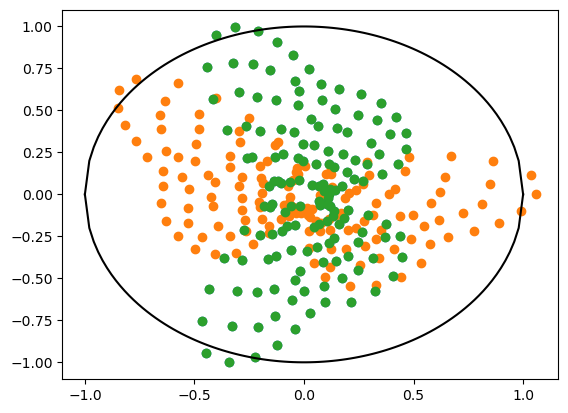

In [56]:
plt.plot(x_circle, y_plus, color='black')
plt.plot(x_circle, y_min, color='black')
plt.scatter(x_in[i,:,:,0], x_in[i,:,:,1])
plt.scatter(x_in_rf[i,:,:,0], x_in_rf[i,:,:,1])
plt.scatter(x_in_rffr[i,:,:,0], x_in_rffr[i,:,:,1])

In [57]:
x_cm, x_in_t, x_D_t = model.translate(x_in, x_D)
r_max, x_in_ts, x_D_ts = model.scale(x_in_t, x_D_t)
theta_max, i_R180, i_flip, x_in_tsrf, x_D_tsrf = model.rotate_flip(x_in_ts, x_D_ts)
x_in_tsrffr = model.rotate_flip_back(theta_max, i_R180, i_flip, x_in_tsrf)
x_in_tsrffrs = model.scaleback(r_max, x_in_tsrffr)
x_in_tsrffrst = model.translateback(x_cm, x_in_tsrffrs)

(array([6.20668e+05, 1.21418e+05, 1.07644e+05, 3.90400e+03, 1.60580e+04,
        2.35000e+02, 1.80700e+03, 2.00000e+00, 3.90000e+01, 1.00000e+00]),
 array([0.00000000e+00, 5.55111512e-17, 1.11022302e-16, 1.66533454e-16,
        2.22044605e-16, 2.77555756e-16, 3.33066907e-16, 3.88578059e-16,
        4.44089210e-16, 4.99600361e-16, 5.55111512e-16]),
 <BarContainer object of 10 artists>)

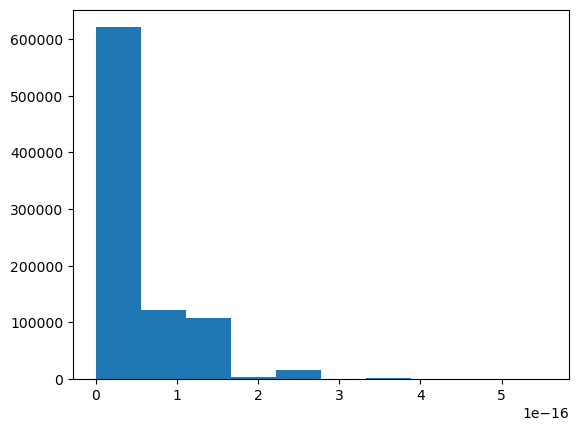

In [62]:
err = np.abs(x_in - x_in_tsrffrst)
plt.hist(err.flatten())

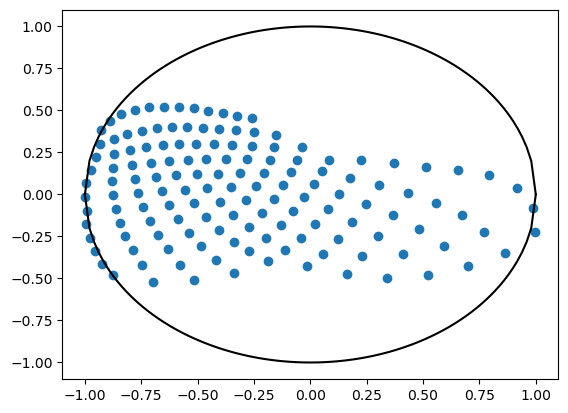

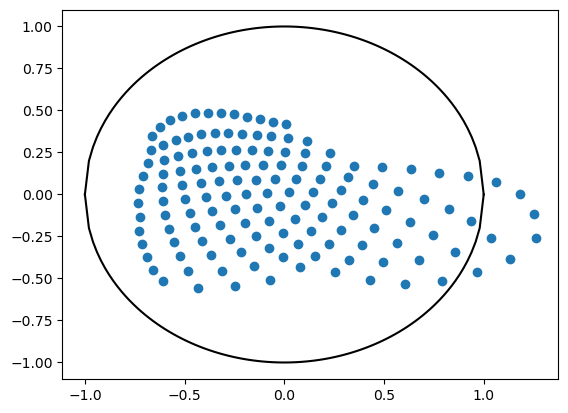

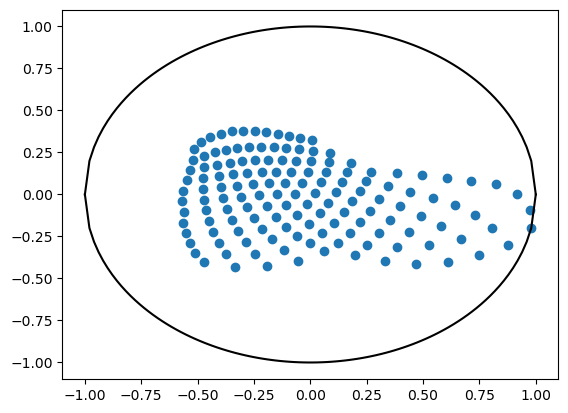

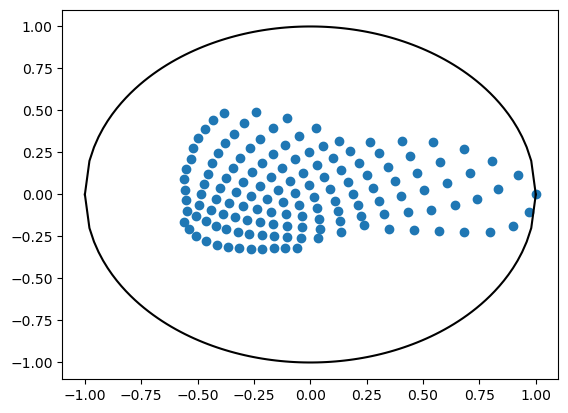

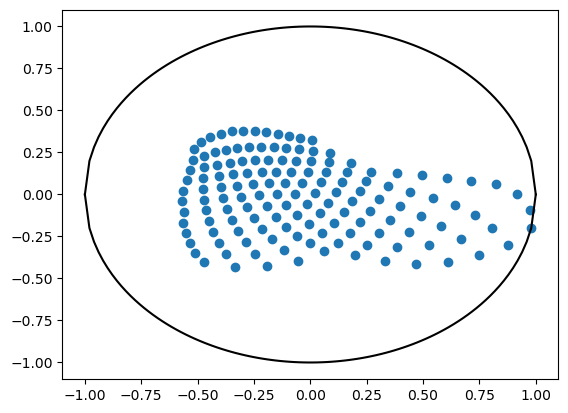

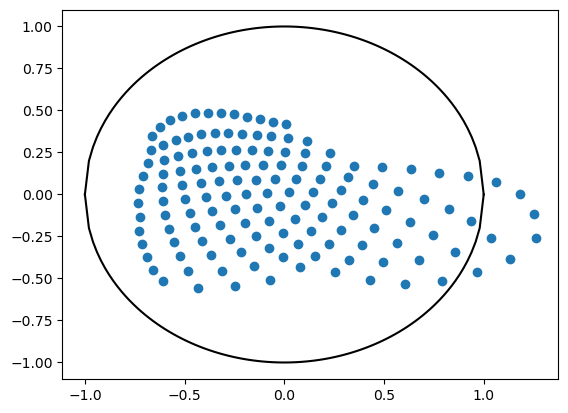

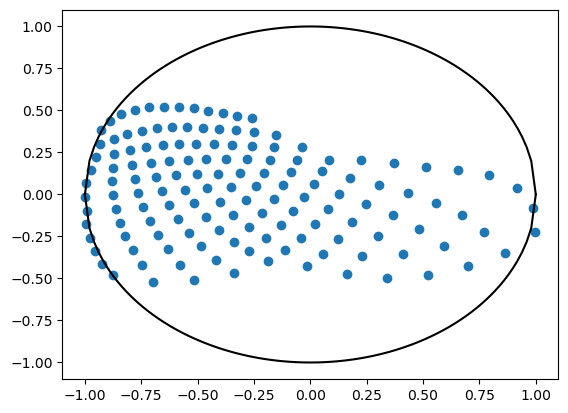

In [66]:
i = 20
plt.plot(x_circle, y_plus, color='black')
plt.plot(x_circle, y_min, color='black')
plt.scatter(x_in[i,:,:,0], x_in[i,:,:,1])
plt.show()
plt.plot(x_circle, y_plus, color='black')
plt.plot(x_circle, y_min, color='black')
plt.scatter(x_in_t[i,:,:,0], x_in_t[i,:,:,1])
plt.show()
plt.plot(x_circle, y_plus, color='black')
plt.plot(x_circle, y_min, color='black')
plt.scatter(x_in_ts[i,:,:,0], x_in_ts[i,:,:,1])
plt.show()
plt.plot(x_circle, y_plus, color='black')
plt.plot(x_circle, y_min, color='black')
plt.scatter(x_in_tsrf[i,:,:,0], x_in_tsrf[i,:,:,1])
plt.show()
plt.plot(x_circle, y_plus, color='black')
plt.plot(x_circle, y_min, color='black')
plt.scatter(x_in_tsrffr[i,:,:,0], x_in_tsrffr[i,:,:,1])
plt.show()
plt.plot(x_circle, y_plus, color='black')
plt.plot(x_circle, y_min, color='black')
plt.scatter(x_in_tsrffrs[i,:,:,0], x_in_tsrffrs[i,:,:,1])
plt.show()
plt.plot(x_circle, y_plus, color='black')
plt.plot(x_circle, y_min, color='black')
plt.scatter(x_in_tsrffrst[i,:,:,0], x_in_tsrffrst[i,:,:,1])
plt.show()